<img src="./img/logos_combined.png" align="right" width="50%"></img>
<br><br><br>

# Geospatial data workflow

## Example I: Create a climate graph of London

A climate graph is commonly used to describe the average weather of one specific location. It contains:
* the <b>long-term average, minimum and maximum air temperature</b> for each month
* the <b>long-term average precipitation</b> for each month

<br>

<img src="./img/climate_graph_london.png" align="centre" width="80%"></img>

<br><br>


### Data required


ERA-Interim reanalysis - 2m air temperature and total precipitation from 1 January 1979 to 31 December 2014
* Format: GRIB
* Spatial resolution: Lat/Lon grid, 0.5 x 0.5 degrees, 720 x 361 gridpoints
* Temporal resolution: 6-hourly
* Data volume: 27 GB per parameter

<br>

### Workflow

(1) Retrieve monthly mean, min and max 2m air temperature from Jan 1979 to Dec 2014

(2) Retrieve monthly sums of total precipitation from Jan 1979 to Dec 2014

(3) Calculate averages for every month for every parameter

(4) Plot the climate graph



<hr>

<img src="./img/access_button.png" align="left" width="10%"></img>

## Part I: Geospatial Data Access

### Example with netCDF4 library





### Example with OGC web services

#### What are OGC web services?

Web services offer a variety of standard protocols that use the internet to view, access and retrieve geospatial data. The Open Geospatial Consortium (OGC) has defined various different protocols for geospatial data.

<br>
<img src="./img/ogc_standards.jpg" align="centre" width="70%"></img>
<br>

* <b>a Web Mapping Service (WMS)</b> e.g. is a widely-used OGC standard for geospatial datasets that returns spatial data as an 'image' or 'static map'
* <b>a Web Coverage Service</b> on the other hand is a data-access protocol that defines and enables the web-based retrieval of multi-dimensional gesopatial datasets.

#### OWSlib library - Using WMS from Python



#### <i>Request layer information</i>

In [14]:
from owslib.wms import WebMapService

# Create your WebMapService object
wms = WebMapService('http://apps.ecmwf.int/wms/?token=public', version='1.1.1') # version 1.3.0 works as well

http://apps.ecmwf.int/wms/


In [10]:
# See available layers
list(wms.contents)

['t_uerra',
 'z500_public',
 't850_public',
 'ws850_public',
 'composition_aod550',
 'background',
 'composition_bbaod550',
 'boundaries',
 'composition_co2_300hpa',
 'composition_co2_50hpa',
 'composition_co2_500hpa',
 'composition_co2_850hpa',
 'composition_co2_surface',
 'composition_co_300hpa',
 'composition_co_50hpa',
 'composition_co_500hpa',
 'composition_co700',
 'composition_co_850hpa',
 'composition_co_upperlevel',
 'composition_co_surface',
 'composition_uvindex_clearsky',
 'composition_duaod550',
 'efas_radar_haz1h',
 'efas_radar_acc',
 'efas_radar_acc24h',
 'z500_mean_public',
 't850_mean_public',
 'ws850_mean_public',
 'msl_mean_public',
 'z500_spread_public',
 't850_spread_public',
 'ws850_spread_public',
 'msl_spread_public',
 'composition_fire',
 'foreground',
 'composition_hcho_300hpa',
 'composition_hcho_50hpa',
 'composition_hcho_500hpa',
 'composition_hcho_850hpa',
 'composition_hcho_surface',
 'grid',
 'msl_public',
 'composition_ch4_300hpa',
 'composition_ch4_50h

In [11]:
# Get layer description
wms['composition_co2_surface'].title

'Carbon dioxide at surface [ ppmv ] (provided by CAMS, the Copernicus Atmosphere Monitoring Service)'

In [12]:
# Get bounding box information in WGS84
wms['composition_co2_surface'].boundingBoxWGS84

(-180.0, -90.0, 180.0, 90.0)

In [13]:
# Get available styles
wms['composition_co2_surface'].styles

{'sh_RdGy_r_co2_surface': {'legend': 'http://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_RdGy_r_co2_surface&width=350&height=50',
  'title': 'Contour shade (Range: 180.0 / 440.0, RdGy_r colours)'},
 'sh_nipy_spectral_co2_surface': {'legend': 'http://apps.ecmwf.int/wms/?token=public&request=GetLegend&layers=composition_co2_surface&styles=sh_nipy_spectral_co2_surface&width=350&height=50',
  'title': 'Contour shade (Range: 180.0 / 440.0, nipy_spectral colours)'}}

In [16]:
# See available methods
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

In [15]:
# Get available formats
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'image/svg+xml',
 'application/pdf',
 'application/postscript',
 'application/vnd.google-earth.kml+xml']

http://apps.ecmwf.int/wms/?token=public&
http://apps.ecmwf.int/wms/?token=public&
http://apps.ecmwf.int/wms/?token=public&


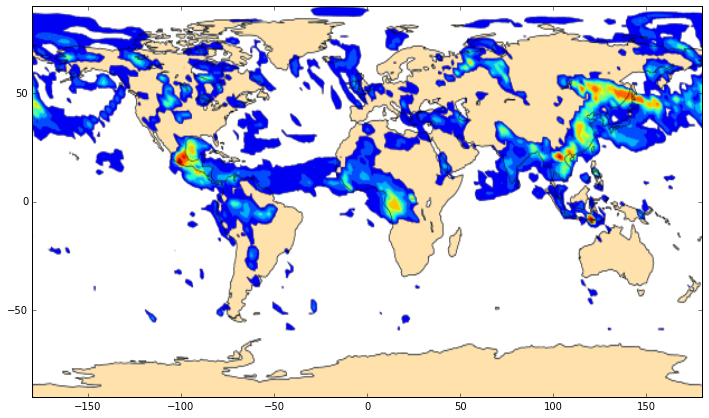

In [18]:
%matplotlib inline
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerName,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=[layerName],
                 size=(600,300),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()
getMap('foreground',(-180,-90,180,90), 'foreground.png')
getMap('background',(-180,-90,180,90), 'background.png')
getMap('composition_bbaod550',(-180,-90,180,90), 'bbaod550.png')


image1=mpimg.imread('background.png')
image2=mpimg.imread('bbaod550.png')
image3=mpimg.imread('foreground.png')
fig = plt.figure(figsize=(12,7))

img1=plt.imshow(image1,extent=[-180,180,-90,90],aspect='auto')
img2=plt.imshow(image2,extent=[-180,180,-90,90],aspect='auto')
img3=plt.imshow(image3,extent=[-180,180,-90,90],aspect='auto')
plt.show()

#### OWSlib library - Using WCS from Python

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. An example of the use of the WebCoverageService class is given.

The library is available from GitHub @ https://github.com/earthserver-eu/OWSLib

<hr>

<img src="./img/processing_button.png" align="left" width="10%"></img>

## Part II: Geospatial Data Processing

<hr>

<img src="./img/visualisation_button.png" align="left" width="10%"></img>

## Part III: Geospatial Data Visualisation

### Example with matplotlib

### Example with bokeh / Jupyter Widgets

<hr>